# Let's explore some data.

## This data set contains COVID-19 patient information pertaining to pre-conditions and hospitlization. Originally from Mexico and in the Spanish language, a translated version of this data has been hosted on Kaggle.

## For now I am ignoring the formatting of the graph. I will make them look nicer in the future.

## This dataset source maybe updated to include more patient information. We will

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

### Let's load the data. We will drop the duplicates in the 'ID' column so that each patient has one record.

In [30]:
covid = pd.read_csv('covid.csv')
covid = covid.drop_duplicates('id')
covid.columns

print(covid.head(5))

       id  sex  patient_type  entry_date date_symptoms   date_died  intubed  \
0  16169f    2             1  04-05-2020    02-05-2020  9999-99-99       97   
1  1009bf    2             1  19-03-2020    17-03-2020  9999-99-99       97   
2  167386    1             2  06-04-2020    01-04-2020  9999-99-99        2   
3  0b5948    2             2  17-04-2020    10-04-2020  9999-99-99        2   
4  0d01b5    1             2  13-04-2020    13-04-2020  22-04-2020        2   

   pneumonia  age  pregnancy  ...  inmsupr  hypertension  other_disease  \
0          2   27         97  ...        2             2              2   
1          2   24         97  ...        2             2              2   
2          2   54          2  ...        2             2              2   
3          1   30         97  ...        2             2              2   
4          2   60          2  ...        2             1              2   

   cardiovascular  obesity  renal_chronic  tobacco  contact_other_covid  \

### The data provides us with the date of deaths for patients. The value '9999-99-99' seems to represent those who survived.

In [7]:
covid.date_died.value_counts()

9999-99-99    527191
16-06-2020       699
08-06-2020       698
10-06-2020       688
12-06-2020       670
               ...  
15-01-2020         1
25-02-2020         1
30-01-2020         1
13-02-2020         1
04-03-2020         1
Name: date_died, Length: 124, dtype: int64

### Let's look at the percentage of patients who died
.

In [9]:
deceased = covid[covid['date_died'] != '9999-99-99']
len(deceased)/len(covid)*100

6.393809670082263

### From a first glance it seems that the death rate in this dataset is about 6.4%

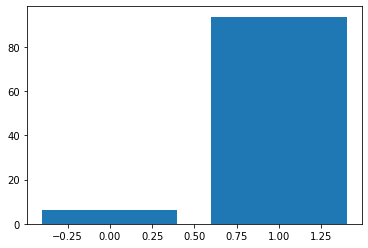

In [21]:
plt.bar([0,1],[len(deceased)/len(covid)*100, 100-(len(deceased)/len(covid)*100)])
plt.show()

### So far we have looked at the entire dataset. This includes people who have not been recognized as having a pre-condition.

In [ ]:
pc = covid[(covid['pregnancy'] == 1) | (covid['diabetes'] == 1) | (covid['copd'] == 1) | (covid['asthma'] == 1) |\
    (covid['inmsupr'] == 1) | (covid['hypertension'] == 1) | (covid['other_disease'] == 1) | (covid['cardiovascular'] == 1) |\
    (covid['obesity'] == 1) | (covid['renal_chronic'] == 1) | (covid['tobacco'] == 1)]

pc_deceased = pc[pc['date_died'] != '9999-99-99']

In [14]:
print(len(deceased))
print(len(pc_deceased))
print(len(pc))

36010
26057
240012


### Of those infected, a large portion had pre-existing conditions.

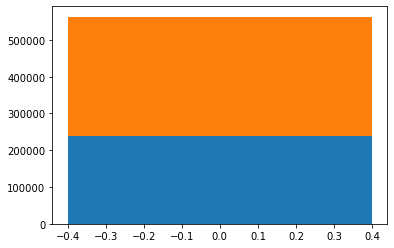

In [24]:
plt.bar(np.arange(1),len(pc))
plt.bar(np.arange(1), len(covid)-len(pc), bottom = len(pc))
plt.show()

### Let's look at the number of patients who died as a result of COVID who had pre-conditions against those who died and did not have a pre-condition

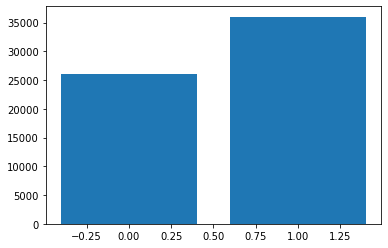

0.7236045542904749

In [26]:
plt.bar([0,1],[len(pc_deceased), len(deceased)])
plt.show()

26057/36010

### From a glance, we can see that the majority of deaths involved those with preconditions, about 72%.

### In our dataset, for the pre-condition columns, 2 represents NO, and 1 represents YES. Let's replace 2/NO with 0. This will allow us to sum up the '1's' in order to see which pre-condtions were most prevelant.

### 

In [27]:
cond_list = ['pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco']
for col in cond_list:
    covid[col] = covid[col].replace(2,0)

In [29]:
covid.head(10)
covid['pregnancy'].value_counts()

97    285398
0     272174
1       4050
98      1579
Name: pregnancy, dtype: int64